In [2]:
#Importing all the libraries needed

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf

In [3]:
# Importing the stock data and storing it in a dataframe

import json
import pandas as pd

tunisian_stock_market = 'Tunisian-Stock-Market.json'
with open(tunisian_stock_market, 'r') as json_file:
    
    json_data = json.load(json_file)

RawStockData = pd.DataFrame(json_data)
bna_data = RawStockData[RawStockData['Stock_name'] == 'BNA']
bna_data = bna_data.sort_values(by='Date')
bna_data.reset_index(inplace=True)
columnsToExclude = ['Code_isin','index','Date' , 'Adj_low' , 'Adj_High' , 'Volume','Stock_name']
bna_data = bna_data.drop(columns=columnsToExclude)
print(bna_data)

      Adj_Close
0        11.173
1        11.129
2        11.349
3        11.283
4        11.305
...         ...
2684      7.340
2685      7.320
2686      7.310
2687      7.320
2688      7.320

[2689 rows x 1 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

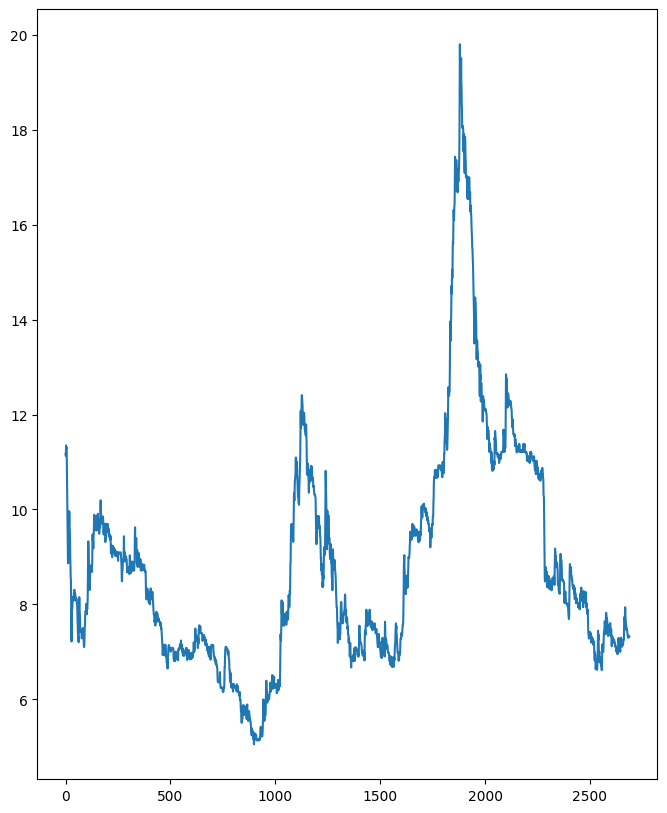

In [4]:
plt.figure(figsize=(8,10))
plt.plot(bna_data)
plt.show

In [5]:
train_data = bna_data[:-100]
test_data = bna_data[-100:]
train_data.shape , test_data.shape


((2589, 1), (100, 1))

In [6]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler(feature_range=(0,1))

In [7]:
train_data_scale = scaler.fit_transform(train_data)
base_days = 100 

x = []
y = []

for i in range(base_days , train_data_scale.shape[0]):
    x.append(train_data_scale[i-base_days:i])
    y.append(train_data_scale[i,0])

x, y = np.array(x), np.array(y)

x = np.reshape(x , (x.shape[0],x.shape[1],1))

In [8]:
from keras.layers import Dense,Dropout, LSTM 
from keras.models import Sequential

model = Sequential()
model.add(LSTM(units = 50 , activation = 'relu' , return_sequences=True,
          input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units = 60 , activation= 'relu' , return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80 , activation= 'relu' , return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120 , activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

c:\Users\namid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')

model.fit(x,y, epochs = 50 , verbose = 1)

Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - loss: 0.0284
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.0050
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - loss: 0.0035
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - loss: 0.0035
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - loss: 0.0028
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - loss: 0.0028
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - loss: 0.0029
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - loss: 0.0024
Epoch 9/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - loss: 0.0022
Epoch 10/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.0021
Epoch 11/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - loss: 0.0023
Epoch 12/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - loss: 0.0016
Epoch 13/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - loss: 0.0019
Epoch 14/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - loss: 0.0019
Epoch 15/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - loss: 0.0020
Epo

In [11]:
test_data = pd.concat((train_data.tail(100), test_data) , ignore_index = True)

In [12]:
test_data_scale = scaler.fit_transform(test_data)

x = []
y = []

for i in range(base_days , test_data_scale.shape[0]):
    x.append(test_data_scale[i-base_days:i])
    y.append(test_data_scale[i,0])

x, y = np.array(x), np.array(y)

x = np.reshape(x , (x.shape[0],x.shape[1],1))

In [13]:
prediction = model.predict(x)

prediction = scaler.inverse_transform(prediction)
evaluation = model.evaluate(x, y)

loss = evaluation if isinstance(evaluation, float) else evaluation[0]
print('The model loss is:', loss)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0093
The model loss is: 0.009788092225790024


In [14]:

m = y  
z = []
future_days = 7
inter = None  
for i in range(base_days, len(m) + future_days):
    m = m.reshape(-1, 1)
    inter = [m[-base_days:, 0]]
    inter = np.array(inter)
    inter = np.reshape(inter, (inter.shape[0], inter.shape[1], 1))
    pred = model.predict(inter)
    m = np.append(m, pred)
    z = np.append(z, pred)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [15]:
z = np.array(z)
z = scaler.inverse_transform(z.reshape(-1,1))
z

array([[7.26252162],
       [7.25877941],
       [7.2533821 ],
       [7.24536551],
       [7.23503373],
       [7.22320701],
       [7.21078209]])

In [16]:
model.save("StockPredictionModel.keras")

Mean Squared Error (MSE): 0.021626693513499027
Mean Absolute Error (MAE): 0.10121010684967029
Root Mean Squared Error (RMSE): 0.14706016970444113
R-squared (Coefficient of Determination): 0.5150779395956218


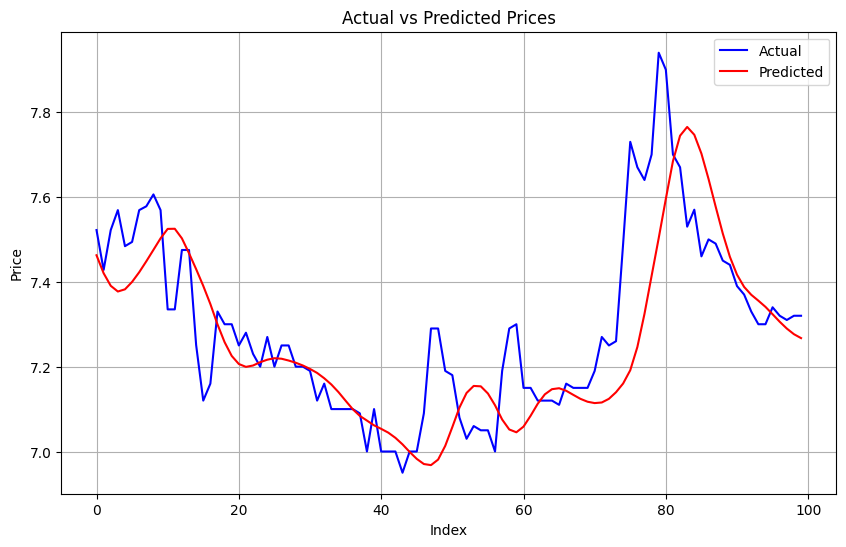

In [19]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Function to calculate Mean Squared Error (MSE)
def calculate_mse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return mse

# Function to calculate Mean Absolute Error (MAE)
def calculate_mae(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    return mae

# Function to calculate Root Mean Squared Error (RMSE)
def calculate_rmse(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return rmse

# Function to calculate R-squared (Coefficient of Determination)
def calculate_r_squared(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    return r2

# Assuming your model predictions are stored in 'prediction' and actual values in 'y'
y_true = scaler.inverse_transform(y.reshape(-1,1))  # Assuming 'y' contains actual values
y_pred = prediction.flatten()  # Assuming 'prediction' is the model's output

# Calculate evaluation metrics
mse = calculate_mse(y_true, y_pred)
mae = calculate_mae(y_true, y_pred)
rmse = calculate_rmse(y_true, y_pred)
r_squared = calculate_r_squared(y_true, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (Coefficient of Determination):", r_squared)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_true, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
